In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import warnings
warnings.filterwarnings("ignore")

## Cutlets data

Reading the data

In [ ]:
from google.colab import files
upload = files.upload()

Saving Cutlets.csv to Cutlets.csv


In [ ]:
cutlets = pd.read_csv("Cutlets.csv")

Understanding the data

In [ ]:
cutlets.head()

,Unit A,Unit B
0,6.8090,6.7703
1,6.4376,7.5093
2,6.9157,6.7300
3,7.3012,6.7878
4,7.4488,7.1522


In [ ]:
cutlets.isnull().sum()

Unit A    0
Unit B    0
dtype: int64

In [ ]:
cutlets.dtypes

Unit A    float64
Unit B    float64
dtype: object

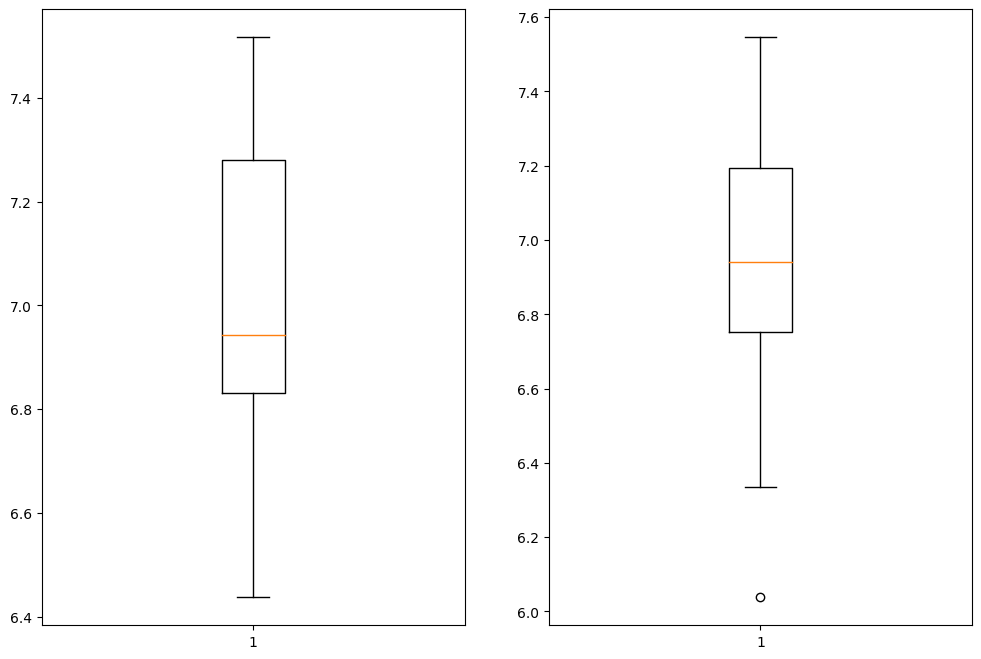

In [ ]:
plt.subplots(figsize = (12,8))
plt.title('Box plot')
plt.subplot(1,2,1)
plt.boxplot(cutlets["Unit A"])

plt.subplot(1,2,2)
plt.boxplot(cutlets["Unit B"])

plt.show()

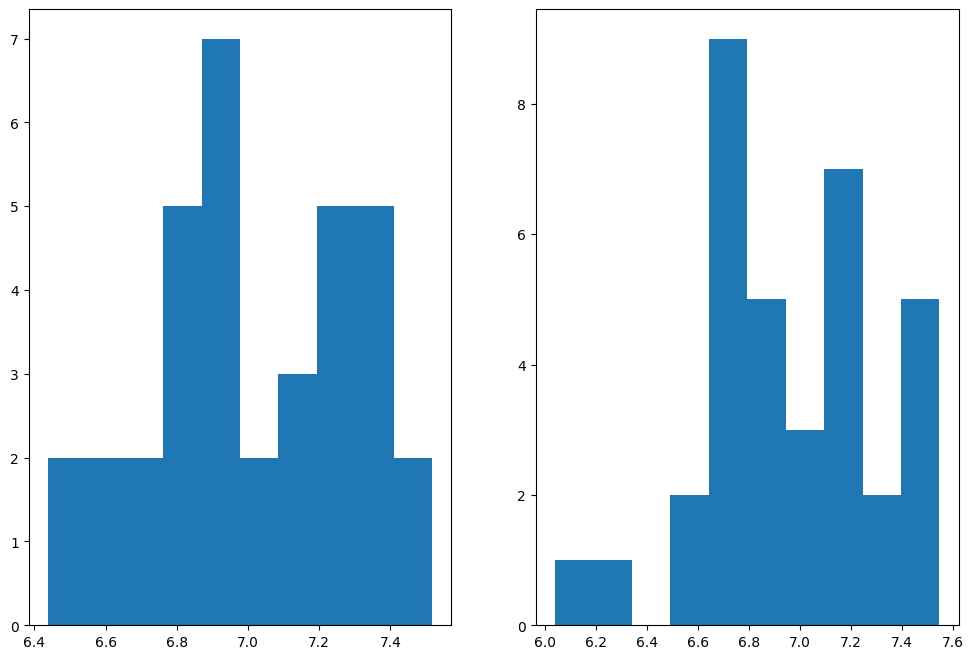

In [ ]:
plt.subplots(figsize = (12,8))
plt.subplot(1,2,1)
plt.hist(cutlets["Unit A"])

plt.subplot(1,2,2)
plt.hist(cutlets["Unit B"])

plt.show()

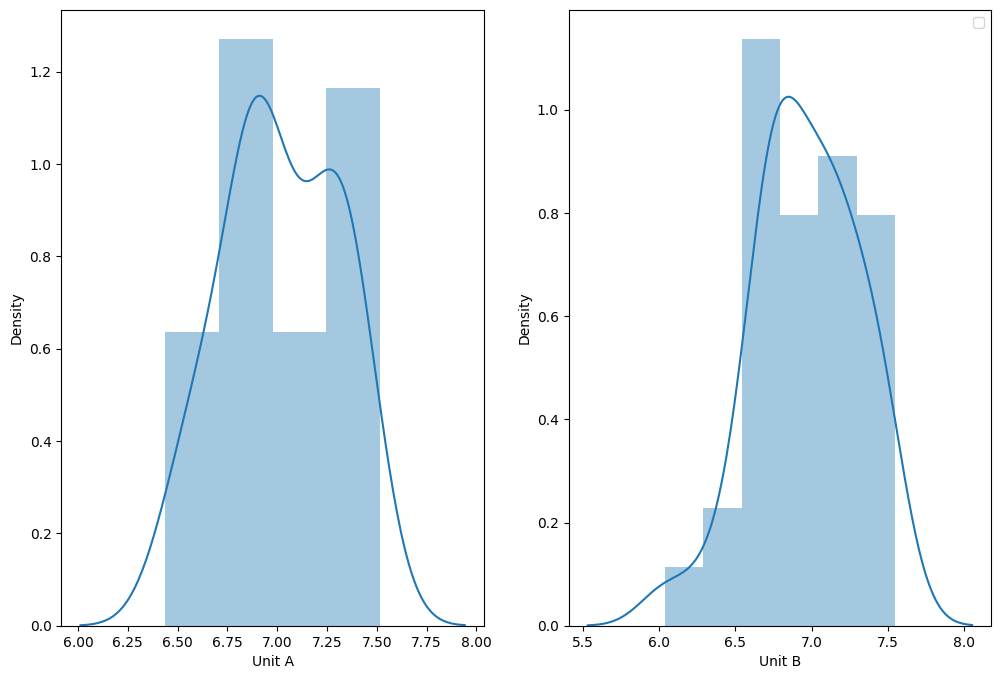

In [ ]:
plt.subplots(figsize = (12,8))
plt.subplot(1,2,1)
sns.distplot(cutlets["Unit A"])

plt.subplot(1,2,2)
sns.distplot(cutlets["Unit B"])

plt.legend()
plt.show()

In [ ]:
cutlets.describe()

,Unit A,Unit B
count,35.000000,35.000000
mean,7.019091,6.964297
std,0.288408,0.343401
min,6.437600,6.038000
25%,6.831500,6.753600
50%,6.943800,6.939900
75%,7.280550,7.195000
max,7.516900,7.545900


Since there is no population standarad deviation we have to t-test

In [ ]:
#since they give the alpha value which is 0.05
alpha = 0.05

As they are asking the similarity of two units so we can say that it is "Two Tail Two Sample" test

we consider null hypothesis as unit_a == unit_b
aslo we say that alternate hypothesis is unit_a != unit b

In [ ]:
#calculating p-value
statistics = stats.ttest_ind(cutlets["Unit A"],cutlets["Unit B"])
statistics

TtestResult(statistic=0.7228688704678063, pvalue=0.4722394724599501, df=68.0)

In [ ]:
p_value = statistics[1]
p_value

0.4722394724599501

In [ ]:
if p_value > alpha:
  print("There is no signigicant difference in the diameter of the cutlet between two units")
else:
  print("There is significant difference in the diameter of the cutlet between two units")

There is no signigicant difference in the diameter of the cutlet between two units


## LabTAT Data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import files
upload = files.upload()

Saving LabTAT.csv to LabTAT.csv


In [ ]:
labtat = pd.read_csv('LabTAT.csv')
labtat.shape

(120, 4)

In [ ]:
labtat.head()

,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4
0,185.35,165.53,176.70,166.13
1,170.49,185.91,198.45,160.79
2,192.77,194.92,201.23,185.18
3,177.33,183.00,199.61,176.42
4,193.41,169.57,204.63,152.60


In [ ]:
#checking null values
labtat.isnull().sum()

Laboratory 1    0
Laboratory 2    0
Laboratory 3    0
Laboratory 4    0
dtype: int64

In [ ]:
labtat[labtat.duplicated()]

,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4


there is no duplicated rows in the data

In [ ]:
labtat.skew()

Laboratory 1   -0.177091
Laboratory 2    0.040659
Laboratory 3    0.133584
Laboratory 4   -0.104030
dtype: float64

In [ ]:
labtat.kurt()

Laboratory 1    0.752237
Laboratory 2   -0.151669
Laboratory 3   -0.395871
Laboratory 4    0.375710
dtype: float64

the skewness and kurtosis indicates that there is only a few of the datapoints are outliers in the given datasets

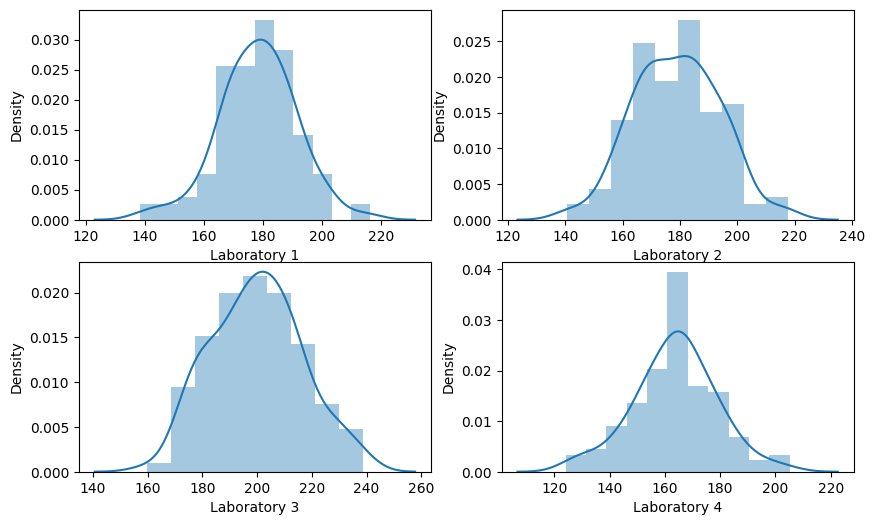

In [ ]:
plt.subplots(figsize = (10,6))
plt.subplot(2,2,1)
sns.distplot(labtat['Laboratory 1'],hist = True)

plt.subplot(2,2,2)
sns.distplot(labtat['Laboratory 2'],hist = True)

plt.subplot(2,2,3)
sns.distplot(labtat['Laboratory 3'],hist = True)

plt.subplot(2,2,4)
sns.distplot(labtat['Laboratory 4'],hist = True)

plt.show()

as we can see above plot, the distribution of data's are almost normally distributed

In [ ]:
#We are using Anova test beacuse we have more than 2 sample data's
from scipy import stats
p_value = stats.f_oneway(labtat.iloc[:,0],labtat.iloc[:,1],labtat.iloc[:,2],labtat.iloc[:,3])[1]
p_value

2.1156708949992414e-57

In [ ]:
#significance level
alpha = 0.05

In [ ]:
print(p_value," ",alpha)
if (p_value != alpha):
  print('we failed to reject null hypothesis, there is a significant difference in avg TAT')
else:
  print('we neglect null hypothesis, there is no significant difference in avg TAT')

2.1156708949992414e-57   0.05
we failed to reject null hypothesis, there is a significant difference in avg TAT


## Buyer Ratio

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import files
upload = files.upload()

Saving BuyerRatio.csv to BuyerRatio.csv


In [ ]:
buyer = pd.read_csv('BuyerRatio.csv')
buyer

,Observed Values,East,West,North,South
0,Males,50,142,131,70
1,Females,435,1523,1356,750


Applying Chisquare Test

In [ ]:
from scipy.stats import chi2_contingency
stat, p, dof, exp = stats.chi2_contingency(buyer.iloc[:,1:])

In [ ]:
print(f"Chi-square statistic: {stat}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected frequencies:")
print(exp)

Chi-square statistic: 1.595945538661058
P-value: 0.6603094907091882
Degrees of Freedom: 3
Expected frequencies:
[[  42.76531299  146.81287862  131.11756787   72.30424052]
 [ 442.23468701 1518.18712138 1355.88243213  747.69575948]]


In [ ]:
observed = np.array[50, 142, 131, 70, 435, 1523, 1356, 750]
predicted = np.array[42.76531299, 146.81287862, 131.11756787, 72.30424052, 442.23468701, 1518.18712138, 1355.88243213, 747.69575948]

In [ ]:
#we consider 0.05 as the significance level
alpha = 0.05

In [ ]:
p_value = stats.chisquare(observed, predicted, 3)[1]
p_value

0.8095206646905712

In [ ]:
if (p_value < alpha):
  print('we neglect null hypothesis, male-female buyers are similar across regions')
else:
  print('we failed to neglect null hypothesis, male-female buyers are not similar across regions')


we failed to neglect null hypothesis, male-female buyers are not similar across regions


## Customer Order Form

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from scipy import stats

In [2]:
from google.colab import files
upload = files.upload()

Saving Costomer+OrderForm.csv to Costomer+OrderForm.csv


In [3]:
customer = pd.read_csv('Costomer+OrderForm.csv')
customer.shape

(300, 4)

In [4]:
customer.head()

,Phillippines,Indonesia,Malta,India
0,Error Free,Error Free,Defective,Error Free
1,Error Free,Error Free,Error Free,Defective
2,Error Free,Defective,Defective,Error Free
3,Error Free,Error Free,Error Free,Error Free
4,Error Free,Error Free,Defective,Error Free


In [5]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Phillippines  300 non-null    object
 1   Indonesia     300 non-null    object
 2   Malta         300 non-null    object
 3   India         300 non-null    object
dtypes: object(4)
memory usage: 9.5+ KB


In [6]:
customer.isnull().sum()

Phillippines    0
Indonesia       0
Malta           0
India           0
dtype: int64

In [7]:
customer['Phillippines'].value_counts()

Error Free    271
Defective      29
Name: Phillippines, dtype: int64

In [8]:
customer['Indonesia'].value_counts()

Error Free    267
Defective      33
Name: Indonesia, dtype: int64

In [9]:
customer['Malta'].value_counts()

Error Free    269
Defective      31
Name: Malta, dtype: int64

In [10]:
customer['India'].value_counts()

Error Free    280
Defective      20
Name: India, dtype: int64

In [32]:
table = np.array([[271,267,269,280],[29,33,31,20]])

In [36]:
from scipy.stats import chi2_contingency
stat, p, dof, exp = stats.chi2_contingency(table)

In [37]:
print(f"Chi-square statistic: {stat}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected frequencies:")
print(exp)

Chi-square statistic: 3.858960685820355
P-value: 0.2771020991233135
Degrees of Freedom: 3
Expected frequencies:
[[271.75 271.75 271.75 271.75]
 [ 28.25  28.25  28.25  28.25]]


In [38]:
#significance level
alpha = 0.05
p

0.2771020991233135

In [39]:
if (p < alpha):
  print("we neglect the null hypothesis, there is a defect in the customer form")
else:
  print("we failed to neglect the null hypothesis, there is no defect in the customer form")

we failed to neglect the null hypothesis, there is no defect in the customer form
